# Work log

We start from training general DQN solution for atari env. Deep Q Learning Solution.ipynb

Then we implement initial secondary experience replay algorithm SER.py

In this implementation we add episode awareness to each experience replay episode. We use this information when we sample minibatches from experience replay buffer. Before each episode we form secondary experience replay subset which consist of the most successfull episodes. The number of sampels a equal to batchsize*coef{32,64,128}. Where coef is a hperparameter. We sample half of the minibatch from this buffer.

Deep Q Learning Solution-SER32

Deep Q Learning Solution-SER64

Deep Q Learning Solution-SER128

The results evaluation available below:

# Initial SER results

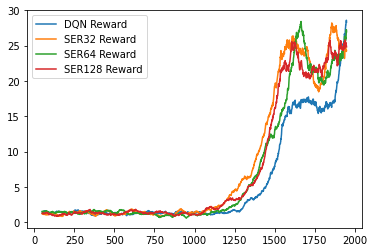

In [20]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt

output_DQN = pd.read_csv("output_DQN.csv") 
output_SER64 = pd.read_csv("output_SER.csv") 
output_SER128 = pd.read_csv("output_SER128.csv") 
output_SER32 = pd.read_csv("output_SER32.csv") 
plt.plot(output_DQN.index[0:1950], output_DQN.Reward.rolling(window=50).mean()[0:1950], label='DQN Reward')
plt.plot(output_DQN.index[0:1950], output_SER32.Reward.rolling(window=50).mean()[0:1950], label='SER32 Reward')
plt.plot(output_DQN.index[0:1950], output_SER64.Reward.rolling(window=50).mean()[0:1950], label='SER64 Reward')
plt.plot(output_DQN.index[0:1950], output_SER128.Reward.rolling(window=50).mean()[0:1950], label='SER128 Reward')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Seems like episode awareness gives some advantage to the training process.

However initially we wanted to utilize this episode context to solve sparse-reward problems, essentially mountain car v0.
This problem is not solvable by baseline algorithms because the chance of solution is very low by taking random actions. We tried to apply it for our task in Deep Q Learning Solution-Mountain_native.ipnotebook

When we apply any baseline algorithm we spend a lot of time on infernece of the action. Instead it is reasonable to focus on efficient experience replay initialization. In original verison of DQN we define experience replay size and collect random experience from the environment till we fill our experience replay buffer. For atari problem the chance of solution is very low and we need to collect positive experience in more efficient way or change our random action sampling algorithm.

We propose the following solution which utilize the initial idea of eposide awareness from secondary experience replay. We also utilize assumption that random actions do not generate efficient beheviour and episode reward as a consenquence. The main assumption that the second cluster of eposide exists with significantly higher reward. This assumption is applicable for the most of RL gym problems, as well as for atari.

The main problem here is to define the difference between the general reward cluster and high reward cluster. WE propose the following algorithm to distingish such cluster and collect significant amount of successfull episdoes for training.

1. Define experience replay size and fill the bufffer with random actions. As native DQN and other off-policy algorithms.
2. Calculate mean reward and standart deviation(initial values). Repeat random experience collection, removing less successfull episodes, till our mean reward reaches threshold of initial_mean_reward+initial_std+0.001(constant for  stablility, useful when initial_mean_reward equal to minimal possible reward, for instance in mountain car environment)

This solution provide the following advantages:
1. It allows to solve mountain-car like environments
2. It applicable to most of off-policy algorithms
3. It significantly improves wall-time performance of training because we do not use policy network to collect random experience. However simulation is very efficient and wall time is still low.


We also tried to apply this method to mountain car
Deep Q Learning Solution-Mountain-optimized.ipynb
But seems like random actions does not provide solution, the only way is to add some kind of momentum to random action sampling in order to be able to collect successfull episodes.


Atari implementation in Deep Q Learning Solution-SERI2, Deep Q Learning Solution-SERI file

Results:


In [2]:
#episode/reward comparison
#wall time comparison

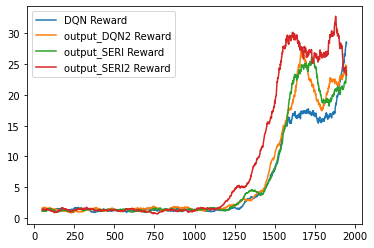

In [4]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt

output_DQN = pd.read_csv("output_DQN.csv") 
output_DQN2 = pd.read_csv("output_DQN2.csv") 
output_SERI = pd.read_csv("output_SERI.csv") 
output_SERI2 = pd.read_csv("output_SERI2.csv") 
plt.plot(output_DQN.index[0:1950], output_DQN.Reward.rolling(window=50).mean()[0:1950], label='DQN Reward')
plt.plot(output_DQN.index[0:1950], output_DQN2.Reward.rolling(window=50).mean()[0:1950], label='output_DQN2 Reward')
plt.plot(output_DQN.index[0:1950], output_SERI.Reward.rolling(window=50).mean()[0:1950], label='output_SERI Reward')
plt.plot(output_DQN.index[0:1950], output_SERI2.Reward.rolling(window=50).mean()[0:1950], label='output_SERI2 Reward')
plt.legend(loc='upper left')
plt.show()

Initially we tried our algorithm with replay_memory_init_size=50000. The results was the same, later we tried to double it. It provided around 10% faster convergence. So SERI implementation is resonable for relatively large initial replay buffer size.

An as a conclusion we can compare the best SERI2, SER and vanila DQN.


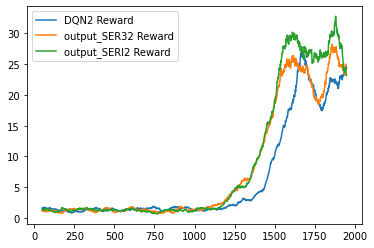

In [8]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt

output_DQN2 = pd.read_csv("output_DQN2.csv") 
output_SER32 = pd.read_csv("output_SER32.csv") 
output_SERI2 = pd.read_csv("output_SERI2.csv") 
plt.plot(output_DQN.index[0:1950], output_DQN2.Reward.rolling(window=50).mean()[0:1950], label='DQN2 Reward')
plt.plot(output_DQN.index[0:1950], output_SER32.Reward.rolling(window=50).mean()[0:1950], label='output_SER32 Reward')
plt.plot(output_DQN.index[0:1950], output_SERI2.Reward.rolling(window=50).mean()[0:1950], label='output_SERI2 Reward')
plt.legend(loc='upper left')
plt.show()

Probably if we combine SER and SERI we can achieve even better results.

In [9]:
!git init

Initialized empty Git repository in /Users/aydarakhmetzyanov/Documents/secondary_experience_replay/.git/


# Some keynotes

http://www.machinelearningconf.org/index.html
Submission Deadline: March 10, 2020

Research proposal
Extending experience replay with priority queue in Reinforcement learning 
Or
Secondary experience replay with reward-based priority queue in Reinforcement Learning
Reinforcement learning/Machine learning/Deep Learning/Robotics

In Q-learning we have experience replay which is limited by its size, so we remove our last experience. The problem is that for some task reward is sparse and we don’t have enough good episodes for value function training. Almost all of baseline algorithms fails on mountain_car_continuous environment. Theoretically we can improve experience replay by adding secondary experience replay where we remove not old experience, but unsuccessful episodes if we reach memory limit. This could be useful improvement to the most algorithms. Probably the true novelty in providing step context to the learner by stranding each step from memory with the episode it belongs to and associated outcome.

References
https://arxiv.org/pdf/1810.01222.pdf CEM-RL: Combining evolutionary and gradient-based methods for policy search
Hinge experience replay
Prioritised experience replay
Cross entropy method
RL algorithms from baseline


the idea is related to curiosity learning
for a recent compact review see page 2 of this paper https://arxiv.org/pdf/2003.13350.pdf
but, as far as I understand, you plan to proceed by 
altering the composition of the experience replay set
while curiosity learning operate on the reward, i.e. by rewarding states that are new

